# <font color='red'>Car Price Prediction</font>

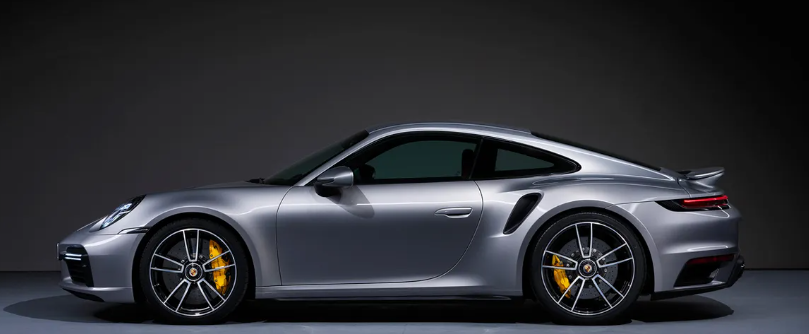

### Problem Statement :
* The price of a car depends on various factors like specification of car. This project aims to analyse the historical data o cars and predicting price of car using machine leanining algorithms. 
* This is supervised machine learning regression problem.

### About dataset:
* I have taken this dataset from kaggle.

In [1]:
#importing important liabriries...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv(r"G:\ML projects\CarPrice_Assignment.csv") 
#reading csv file

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## <font color='blue'> Understanding Data </font>

In [4]:
df.shape

(205, 26)

##### Dataset contains 26 columns and 205 rows 

## Data dictionary  

1)Car_ID -->Unique id of each observation

2)Symboling -->Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe(Categorical)		
3)carCompany-->Name of car company (Categorical)		
4)fueltype--->car fuel type i.e gas or diesel (Categorical)		
5)aspiration-->Aspiration used in a car (Categorical)		
6)doornumber--->Number of doors in a car (Categorical)		
7)carbody-->body of car (Categorical)		
8)drivewheel-->type of drive wheel (Categorical)		
9)enginelocation--->Location of car engine (Categorical)		
10)wheelbase-->Weelbase of car (Numeric)		
11)carlength--->Length of car (Numeric)		
12)carwidth-->Width of car (Numeric)		
13)carheight--->height of car (Numeric)		
14)curbweight--->The weight of a car without occupants or baggage. (Numeric)		
15)enginetype--->Type of engine. (Categorical)		
16)cylindernumber--->cylinder placed in the car (Categorical)		
17)enginesize--->Size of car (Numeric)		
18)fuelsystem--->Fuel system of car (Categorical)		
19)boreratio--->Boreratio of car (Numeric)		
20)stroke-->Stroke or volume inside the engine (Numeric)		
21)compressionration--->compression ratio of car (Numeric)		
22)horsepower--->Horsepower (Numeric)		
23)peakrpm--->car peak rpm (Numeric)		
24)citympg-->Mileage in city (Numeric)		
25)highwaympg--->Mileage on highway (Numeric)		
26)price--->Price of car (Numeric)		'''


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* There are 10 categorical columns and 16 numerical columns
* There is not need to change the datatype of any column

In [6]:
df.describe(include=['int','float'])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Insights:
* car_ID is a sequencial column, we will not consider it.
* price is our target variable which is in dollar. It ranges between 7788 dollars to 45400 dollar.
* symboling in a categorical columns which is encoded.
* Average milege of cars on city is 25 and on highway 31.


In [7]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


### Insights:
* Car name has both company name and car name. To reduce the cardinality we have to extract only company from CarName column

## <font color='blue'> Cleaning the Data </font>

In [8]:
# checking foor null values
df.isnull().sum().to_frame().rename(columns={0:"Total Null Values"})

,Total Null Values
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


##### Data is clean, there is not any null value.

In [9]:
# checking for duplicates
df.duplicated().sum()

0

##### There isnot any duplicate value.

In [10]:
# Extracting Company from CarName column

company=df['CarName'].apply(lambda x:x.split(" ")[0])

df.insert(2,"company",company)

#now there is no need to keep CarName column

In [11]:
# dropping unwanted columns
df.drop(['car_ID','CarName'],axis=1,inplace=True)

In [12]:
df.head()

,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### There are some incorrect names of cars like 
* maxda and mazda
* Nissan and nissan
* porsche and porcshce
* toyota and toyouta
* vokswagen, volkswagen and vw

In [14]:
# replacing these values
def replace_values(a,b):
    return df['company'].replace(a,b,inplace=True)


In [15]:
replace_values('maxda','mazda')
replace_values('nissan','Nissan')
replace_values('porcshce','porsche')
replace_values('toyouta','toyota')
replace_values('vokswagen','volkswagen')
replace_values('vw','volkswagen')

In [16]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

##### Data is cleaned it's time for Data Visualization

## <font color='blue'> Data Visuliaztion </font>

<AxesSubplot:ylabel='price'>

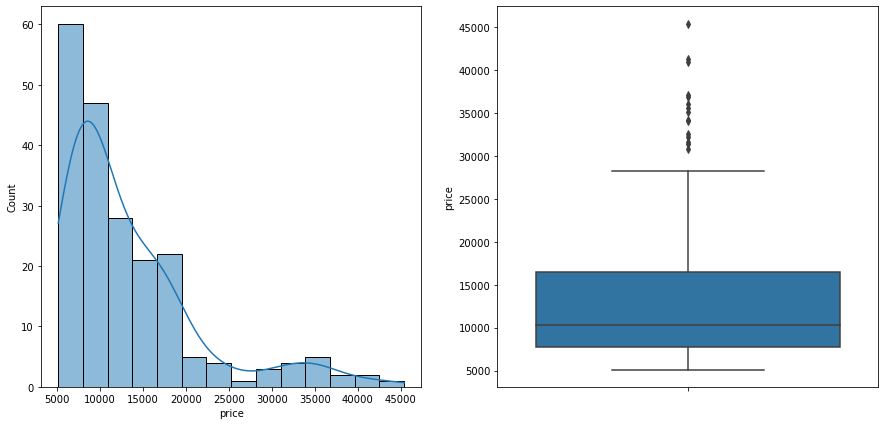

In [17]:
# analysing tarrgent column
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(df.price,kde=True)

plt.subplot(1,2,2)
sns.boxplot(y=df.price)

In [18]:
df.price.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
price,205.0,13276.710571,7988.852332,5118.0,7788.0,10295.0,16503.0,45400.0


### Insights: 
* Price column is positive skewed 

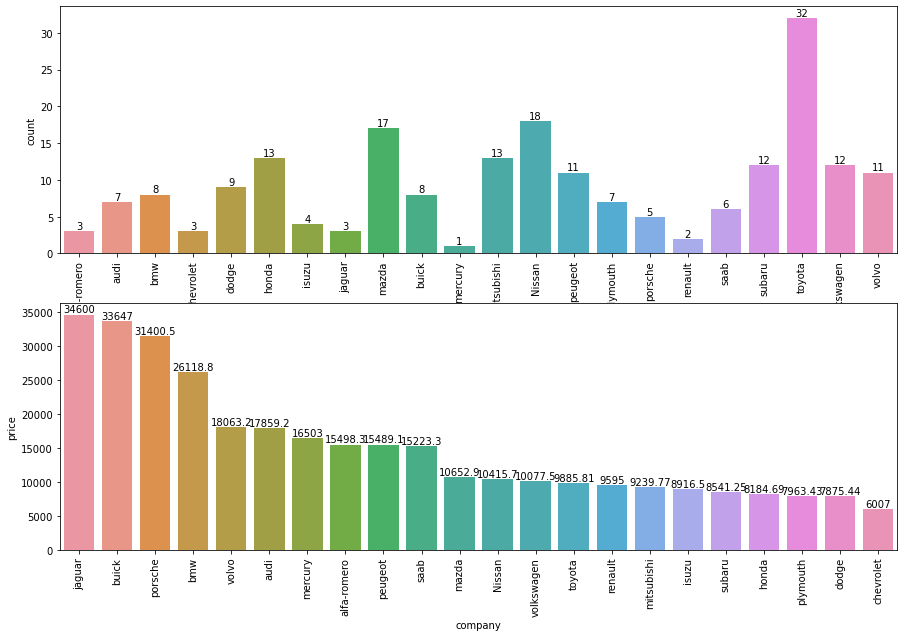

In [19]:
#Car company 
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax=sns.countplot(df.company)
plt.xticks(rotation=90)
x=ax.bar_label(ax.containers[0]) #stored unwanted labels and text in variables

plt.subplot(2,1,2)
cp=pd.DataFrame(df.groupby('company')['price'].mean().sort_values(ascending=False))
ax=sns.barplot(x=cp.index,y=cp.price)
plt.xticks(rotation=90)
x=ax.bar_label(ax.containers[0])

### Insights:
* toyota has sold most of the vehicle i.e. Toyota is favourite company.
* There are less sales for mercury and renault company.
* Jaguar,buick and porsche manufacture most expensive cars.

In [20]:
## creating a function to plot bar plots for categorical columns

def _plot(col):
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    ax=sns.countplot(df[col],palette="magma")
    x=ax.bar_label(ax.containers[0])
    plt.title("{0} vs counts".format(col))
    
    plt.subplot(1,3,2)
    gby=pd.DataFrame(df.groupby(col)['price'].mean().sort_values(ascending=False))
    ax=sns.barplot(x=gby.index,y=gby.price,palette="viridis")
    x=ax.bar_label(ax.containers[0])
    plt.title("{0} vs Avg price".format(col))
    
    plt.subplot(1,3,3)
    sns.boxplot(x=df[col],y=df['price'])
    plt.title("{0} vs price".format(col))
    
        

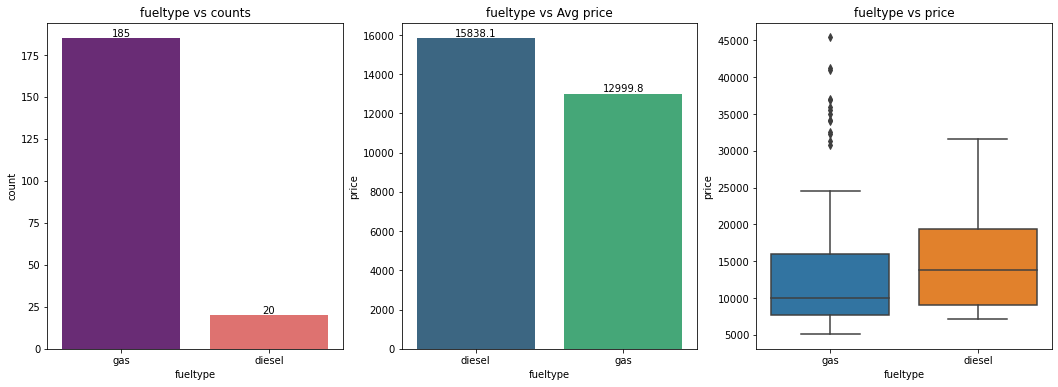

In [21]:
_plot('fueltype')

### Insights:
* People are prefering gas cars over diesel
* Diesel cars are expensive than gas cars.
* Gas car is available in high range also.

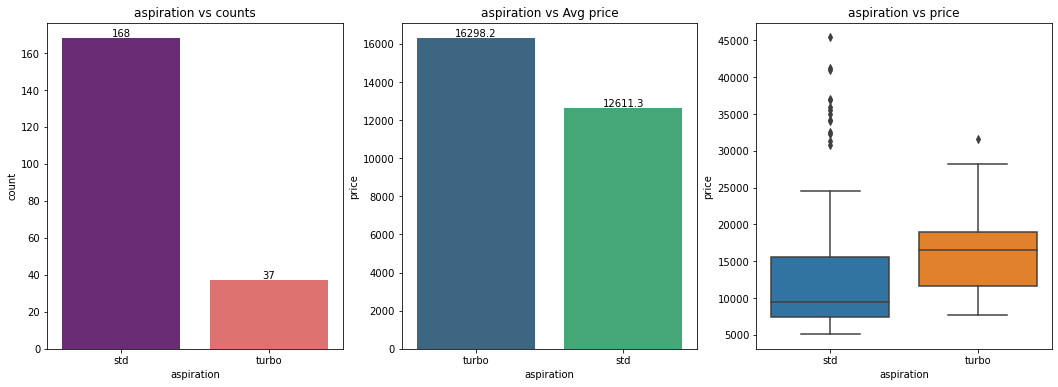

In [22]:
_plot('aspiration')

### Insights:
* Customers are prefering Std aspiration type.
* Avg price of turbo type is higher than std type.
* std type aspiration cars are avaliable in higher range also.

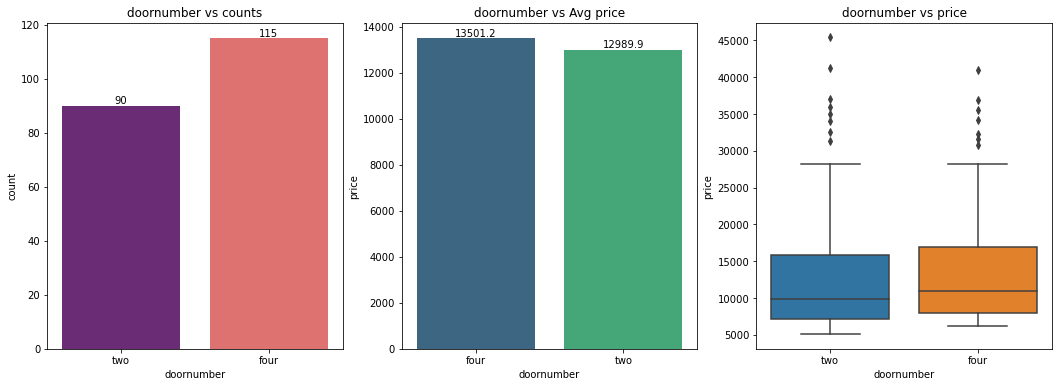

In [23]:
_plot('doornumber')

### Insights:
* Customers are prefering four door cars.
* Price is not that much dependant on doornumber

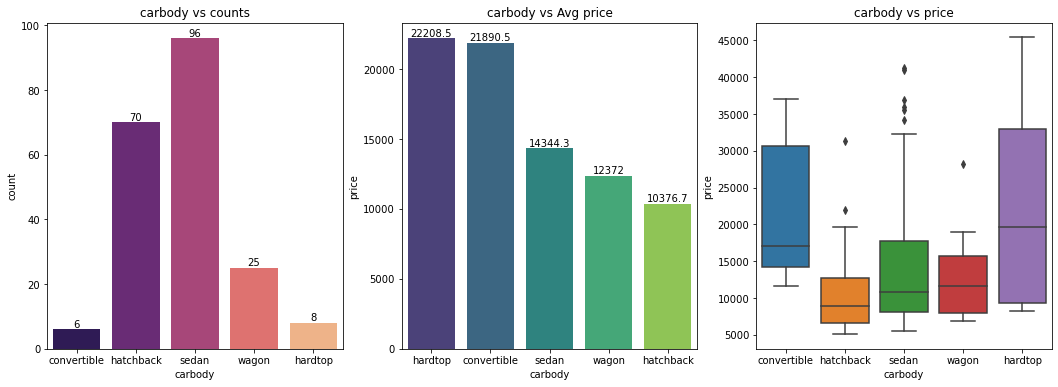

In [24]:
_plot('carbody')

### Insights:
* Sedan and hatchback are highly sold cars because they are prefered for family.
* Hardtop and convertible are most expensive cars. Therefore customers are not buying these cars.

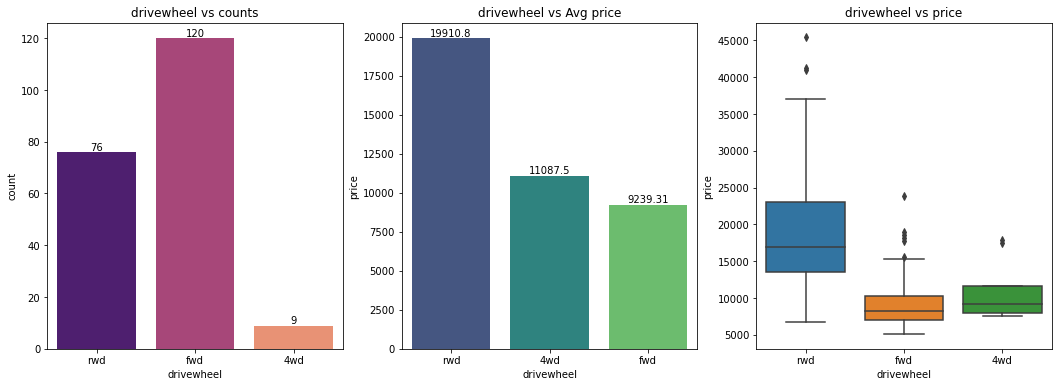

In [25]:
_plot('drivewheel')

### Insights:
* Forward wheel drive cars are most sold cars.
* Rear wheel drive cars are expensive.

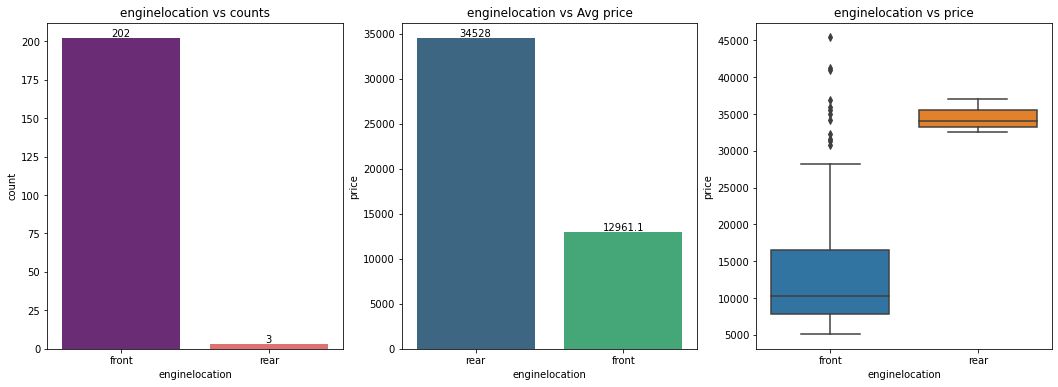

In [26]:
_plot('enginelocation')

### Insights:
* Most of the cars have engine on front.
* Rear side engine type cars are expensive because they are used in sports car.

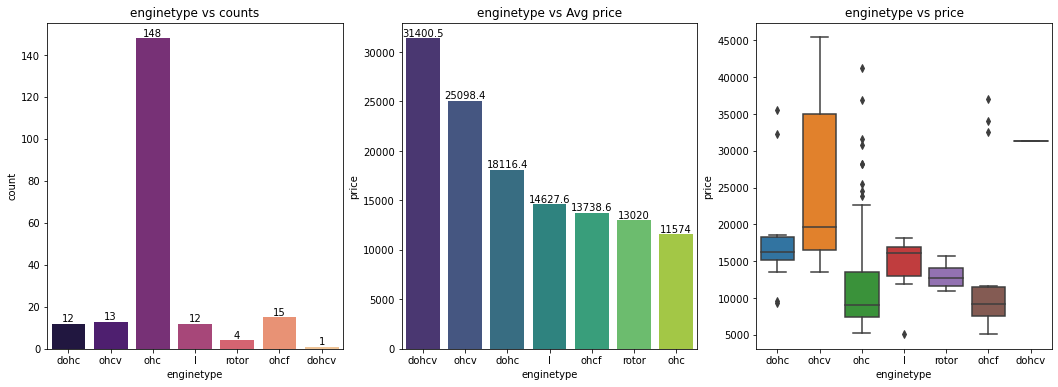

In [27]:
_plot('enginetype')

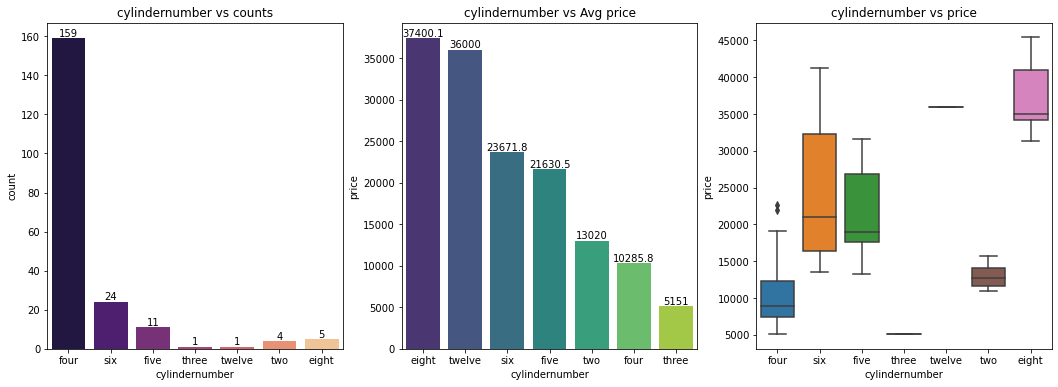

In [28]:
_plot('cylindernumber')

### Insights:
* Four cylinder engines are being used in a car mostly.
* Eight and Twelve cylinder engines are expensive.
* As the number of cylinders increases, price of car also increases.

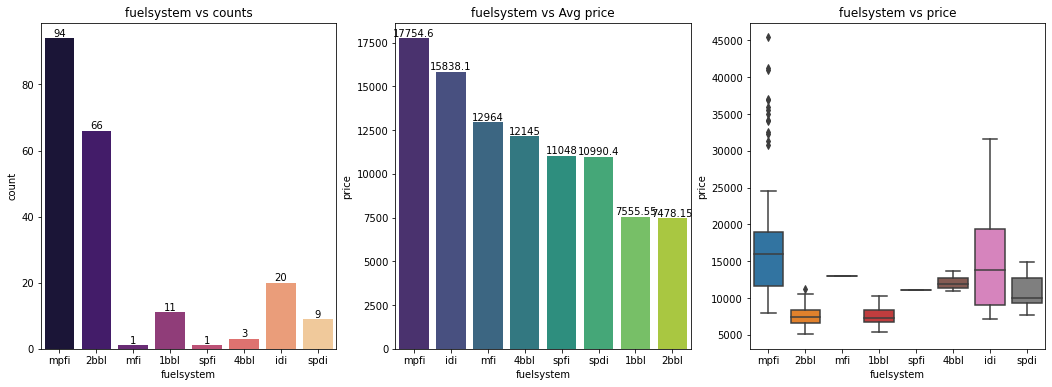

In [29]:
_plot('fuelsystem')

### Insights:
* multi point fuel injection system is being used in a car.
*  multi point fuel injection system is expensive but it is available in every price point.

In [30]:
def num_plot(cols):
    c=1
    plt.figure(figsize=(17,6))
    for i in cols:
        plt.subplot(1,3,c)
        sns.scatterplot(x=i,y='price',data=df,color='red')
        sns.lineplot(x=i,y='price',data=df,color='green')
        plt.title("{0} vs Price".format(i))
        plt.tight_layout()
        c=c+1

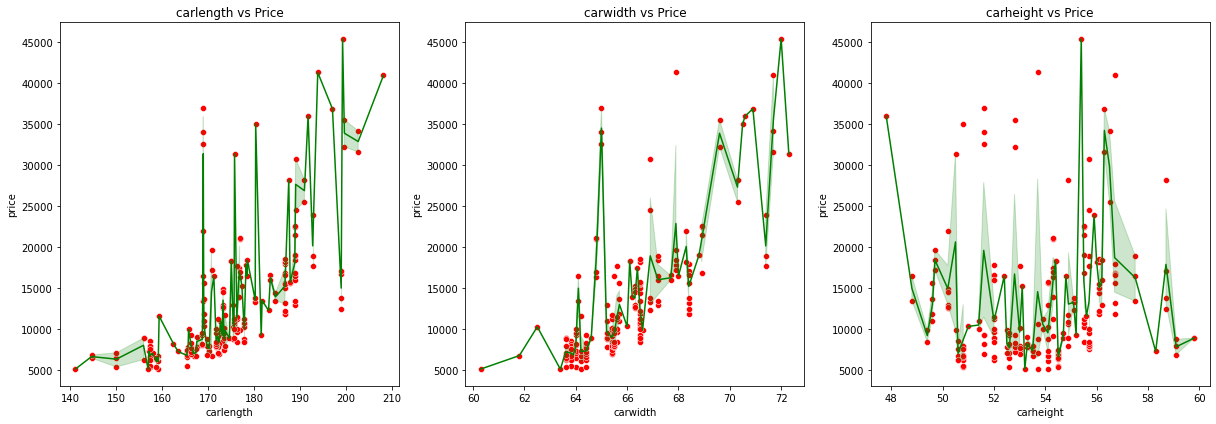

In [31]:
num_plot(['carlength','carwidth', 'carheight'])

### Insights:
* carlenght and carwidth have positive correlation with price.
* As the lenght and width of car increases, price also increases.
* price is not dependant on carheight.

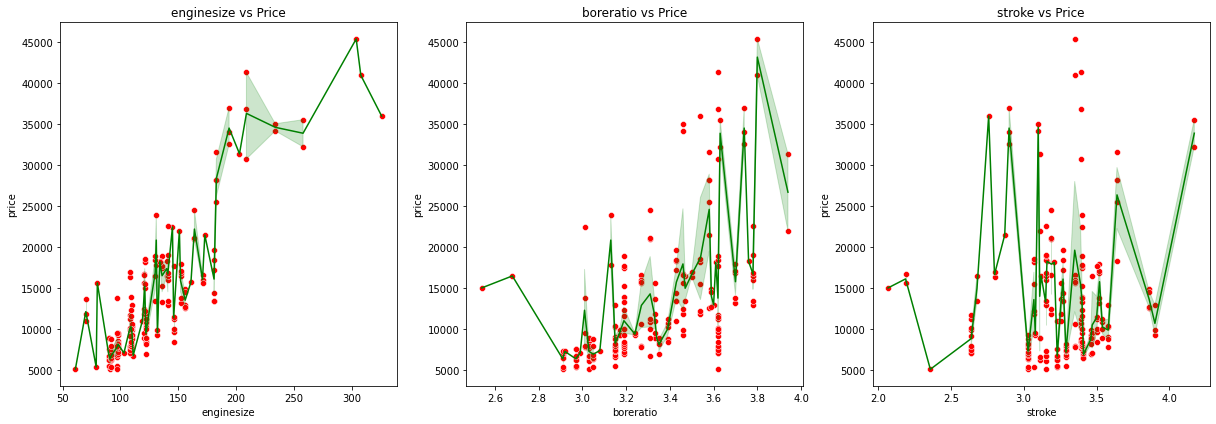

In [32]:
num_plot(['enginesize','boreratio', 'stroke'])

### Insights:
* Enginesize is highly correlated with price. So we can say with the increment in enginesize the price of the cars increases.
* From Boreratio vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features.
* From Stroke vs Price we can't make any inference as the data-points are too scattered.

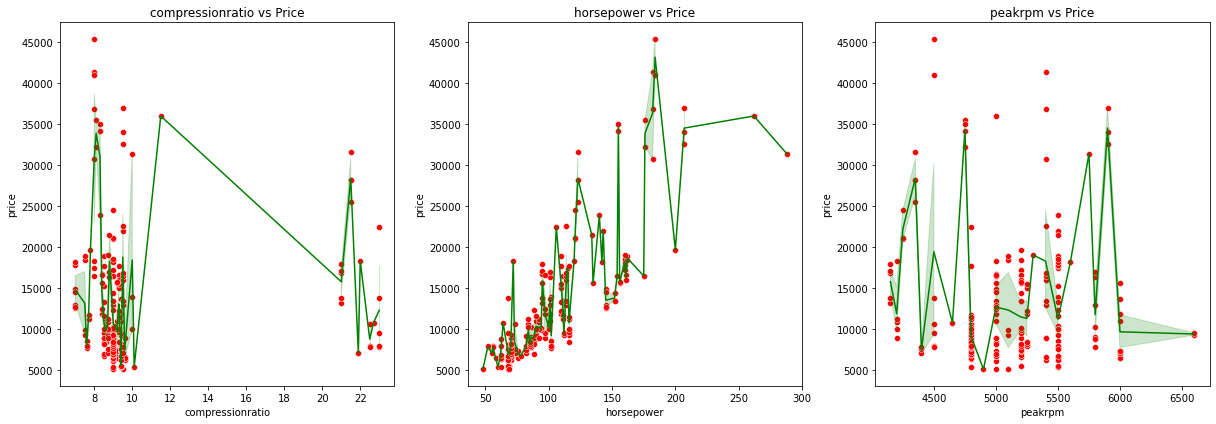

In [33]:
num_plot(['compressionratio','horsepower', 'peakrpm'])

### Insights:
* compression ratio and peakrpm are not correlation with price.
* Hoursepower has positive correlation with price.

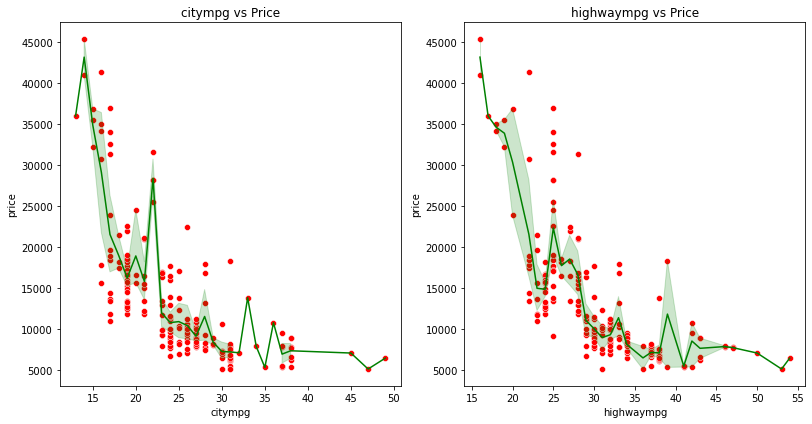

In [34]:
num_plot(['citympg', 'highwaympg'])

### Insights:
* citympg and highwaympg have negative correlation with price.
* As the price increases, mileage decreases.

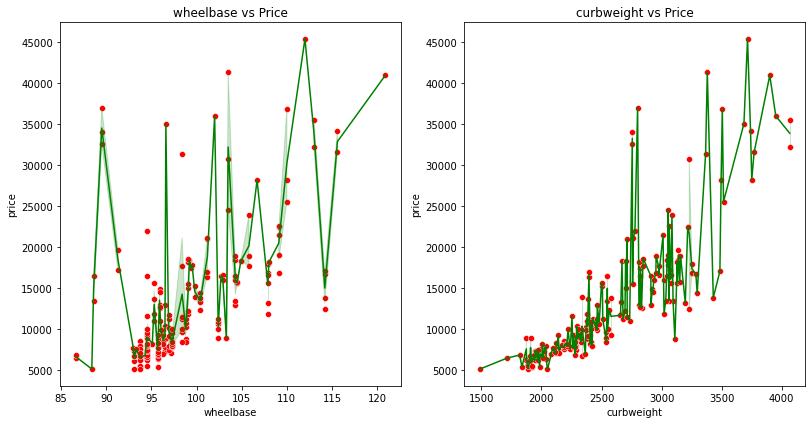

In [35]:
num_plot(['wheelbase','curbweight'])

### Insights:
* We can clearly observe that Curbweight is highly correlated with Price. As curbweight increases,price of cars increases.
* From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the
price of the cars also increases.

In [36]:
#sns.pairplot(num_col,diag_kind='kde')

<AxesSubplot:xlabel='symboling', ylabel='price'>

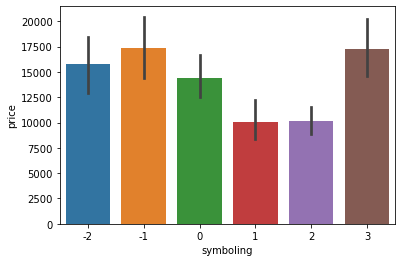

In [37]:
sns.barplot(df.symboling,df.price)

* There is not any inferential that i can take from symboling. So we will not consider this feature.

## <font color='blue'> Preprocessing </font>

In [39]:
cat_col=df.select_dtypes('object')
cat_col.insert(10,'symboling',df.symboling)
cat_col

,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,1
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,2
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,2
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,-1
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,-1
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,-1
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,-1


In [40]:
num_col=df.select_dtypes(['int','float']).drop(['symboling','price'],axis=1)
num_col

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


## <font color='blue'> Feature Encoding </font>

In [178]:
#creating new dataframe 
df_new=df.copy()

In [179]:
df_new.drop('symboling',axis=1,inplace=True) # droping unwanted feature

In [180]:
#using one hot encoding for all categorical features except company
df_new=pd.get_dummies(data=df_new,columns=['fueltype', 'aspiration', 'doornumber', 'carbody','drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem'])

In [181]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new.company=le.fit_transform(df_new.company)

In [182]:
df_new.head()

,company,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


Data is encoded properly.

## <font color='blue'> Feature Selection</font>

* 1 Variance Threshold

In [196]:
from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold(threshold=0.1)
var.fit(df_new.select_dtypes(['int','float']))

VarianceThreshold(threshold=0.1)

In [197]:
variance=pd.DataFrame({'columns name':df_new.select_dtypes(['int','float']).columns,
                       'Variance':var.get_support()})
variance

,columns name,Variance
0,company,True
1,wheelbase,True
2,carlength,True
3,carwidth,True
4,carheight,True
5,curbweight,True
6,enginesize,True
7,boreratio,False
8,stroke,False
9,compressionratio,True


boreratio and stroke have constant values so we will not consider these features.

* Correlation metrics

<AxesSubplot:>

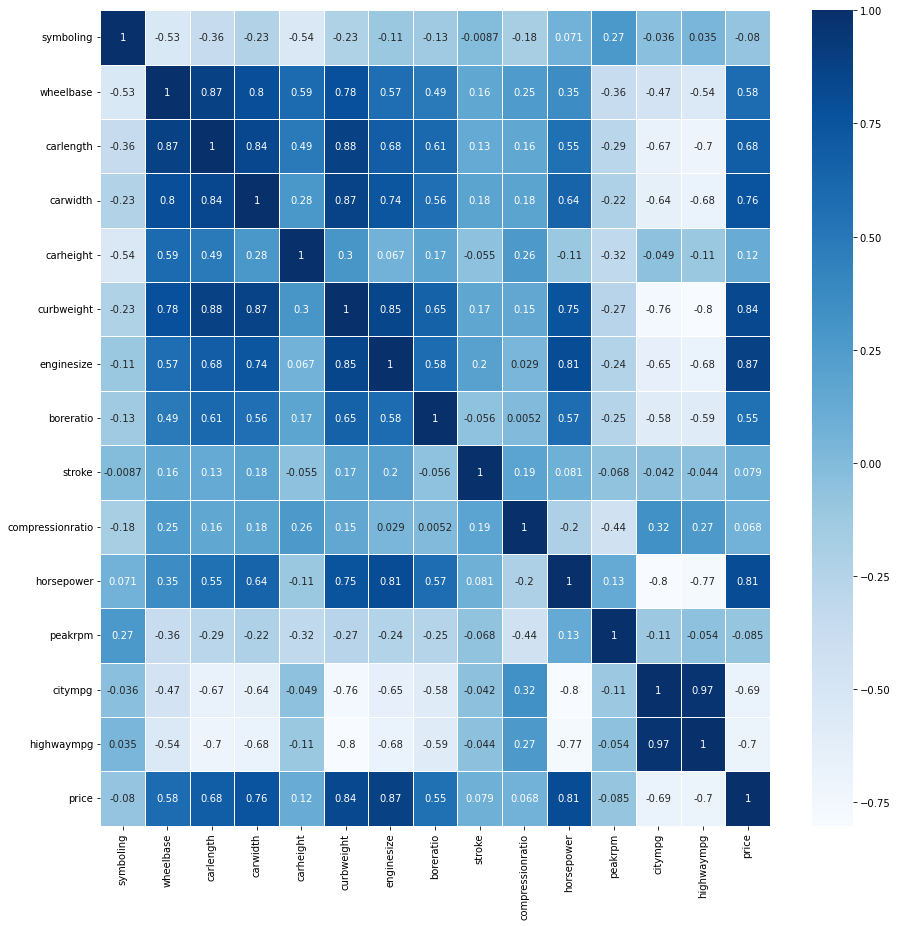

In [199]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=1,cmap="Blues")

### Insights:
* 'carheight','stroke','peakrpm' and 'compressionratio' are not correlated with price.
* There is some multi-collinearity between features

In [200]:
#droping unwanted features
df_new.drop(['carheight','stroke','peakrpm','compressionratio','highwaympg'],axis=1,inplace=True)

##  <font color='blue'> Train Test split </font>

In [203]:
x=df_new.drop('price',axis=1)
y=df_new.price

In [204]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [205]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 47)
(62, 47)
(143,)
(62,)


## <font color='blue'> Feature Scaling </font>

Most of the features are following Normal distribution, so we will do feature scaling using StandardScalar

In [206]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

Data is scaled.

## <font color='blue'> Model Building </font>

In [208]:
from sklearn.metrics import r2_score

training_score=[]
testing_score=[]

def run_model(model):
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    a=r2_score(y_train,y_pred_train)
    b=r2_score(y_test,y_pred_test)
    training_score.append(a)
    testing_score.append(b)
    
    print('Training score=',a)
    print('Testing score=',b)

### Linear Regression

In [209]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

run_model(LR)

Training score= 0.9465856263086622
Testing score= 0.8674468291844357


### Desicion Tree Regressor

In [210]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='squared_error',min_samples_split=2,min_samples_leaf=1,max_depth=5)
run_model(dtr)

Training score= 0.9676913721378566
Testing score= 0.901577211194784


### Random Forest Regressor

In [211]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,criterion='squared_error',min_samples_split=2,min_samples_leaf=1)
run_model(rfr)

Training score= 0.9857005963326498
Testing score= 0.944013838249999


### Adaboost regressor

In [212]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(estimator=dtr,n_estimators=50,learning_rate=1.0)
run_model(abr)

Training score= 0.9878237227116791
Testing score= 0.9236777189853607


### Gradient Boosting Regressor

In [213]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 150)
run_model(gbr)

Training score= 0.9961803195914166
Testing score= 0.9244508399545057


In [214]:
performance=pd.DataFrame(
{ 'Model':['LinearRegressor','DecisionTreeRegressor','RandomForestRegressor','AdaBoostRegressor','GradientBoostRegressor'],
  'Training Score':training_score,
  'Testing Score':testing_score},index=[1,2,3,4,5])
performance.head()

,Model,Training Score,Testing Score
1,LinearRegressor,0.946586,0.867447
2,DecisionTreeRegressor,0.967691,0.901577
3,RandomForestRegressor,0.985701,0.944014
4,AdaBoostRegressor,0.987824,0.923678
5,GradientBoostRegressor,0.996180,0.924451


<AxesSubplot:xlabel='Model'>

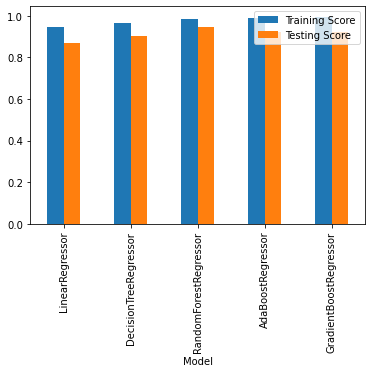

In [215]:
performance.plot(x="Model",y=['Training Score','Testing Score'],kind='bar')

### NN 

In [93]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

In [144]:
nn=Sequential()
#i/p layer
nn.add(Dense(128,input_dim=x_train_scaled.shape[1],activation='relu'))
nn.add(Dropout(0.2))

#2nd layer
nn.add(Dense(64,activation='relu'))
nn.add(Dropout(0.2))

nn.add(Dense(32,activation='relu'))
nn.add(Dropout(0.2))

#o/p layer
nn.add(Dense(1,activation='linear'))

In [145]:
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               6784      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                

In [146]:
Early_stop=EarlyStopping(monitor='val_loss',patience=20)

In [147]:
nn.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [ ]:
outlier_range(df.price)

In [148]:
hist=nn.fit(x_train_scaled,y_train,validation_split=0.2,epochs=300,
      callbacks=Early_stop)

Epoch 1/300
4/4 [==============================] - 1s 36ms/step - loss: 227227760.0000 - mae: 13156.9609 - val_loss: 293804224.0000 - val_mae: 14396.1973
Epoch 2/300
4/4 [==============================] - 0s 8ms/step - loss: 227202096.0000 - mae: 13156.1396 - val_loss: 293781120.0000 - val_mae: 14395.4785
Epoch 3/300
4/4 [==============================] - 0s 9ms/step - loss: 227185184.0000 - mae: 13155.4678 - val_loss: 293754080.0000 - val_mae: 14394.6592
Epoch 4/300
4/4 [==============================] - 0s 8ms/step - loss: 227160464.0000 - mae: 13154.6406 - val_loss: 293720576.0000 - val_mae: 14393.6650
Epoch 5/300
4/4 [==============================] - 0s 9ms/step - loss: 227124928.0000 - mae: 13153.5010 - val_loss: 293677600.0000 - val_mae: 14392.4131
Epoch 6/300
4/4 [==============================] - 0s 8ms/step - loss: 227072240.0000 - mae: 13151.9121 - val_loss: 293622976.0000 - val_mae: 14390.8262
Epoch 7/300
4/4 [==============================] - 0s 8ms/step - loss: 227046656.

4/4 [==============================] - 0s 8ms/step - loss: 26028532.0000 - mae: 4238.3281 - val_loss: 42647332.0000 - val_mae: 4746.9097
Epoch 55/300
4/4 [==============================] - 0s 8ms/step - loss: 27136396.0000 - mae: 4319.3984 - val_loss: 41490420.0000 - val_mae: 4634.4155
Epoch 56/300
4/4 [==============================] - 0s 8ms/step - loss: 23897874.0000 - mae: 4066.1523 - val_loss: 40643324.0000 - val_mae: 4531.8677
Epoch 57/300
4/4 [==============================] - 0s 8ms/step - loss: 29090360.0000 - mae: 4261.9375 - val_loss: 40010024.0000 - val_mae: 4441.5439
Epoch 58/300
4/4 [==============================] - 0s 8ms/step - loss: 20278408.0000 - mae: 3759.7483 - val_loss: 39574476.0000 - val_mae: 4370.8652
Epoch 59/300
4/4 [==============================] - 0s 8ms/step - loss: 19624600.0000 - mae: 3544.5989 - val_loss: 39104116.0000 - val_mae: 4306.6758
Epoch 60/300
4/4 [==============================] - 0s 8ms/step - loss: 18127548.0000 - mae: 3418.2803 - val_loss

Epoch 109/300
4/4 [==============================] - 0s 8ms/step - loss: 9072840.0000 - mae: 2346.5791 - val_loss: 32378052.0000 - val_mae: 3406.8523
Epoch 110/300
4/4 [==============================] - 0s 8ms/step - loss: 7816562.5000 - mae: 2216.6682 - val_loss: 32419712.0000 - val_mae: 3396.7520
Epoch 111/300
4/4 [==============================] - 0s 8ms/step - loss: 8506509.0000 - mae: 2212.6626 - val_loss: 32476992.0000 - val_mae: 3385.9299
Epoch 112/300
4/4 [==============================] - 0s 8ms/step - loss: 7996388.0000 - mae: 2082.8586 - val_loss: 32649276.0000 - val_mae: 3384.6218
Epoch 113/300
4/4 [==============================] - 0s 8ms/step - loss: 12208907.0000 - mae: 2553.5884 - val_loss: 32848530.0000 - val_mae: 3388.6606
Epoch 114/300
4/4 [==============================] - 0s 8ms/step - loss: 10766768.0000 - mae: 2453.9951 - val_loss: 32947122.0000 - val_mae: 3395.9114
Epoch 115/300
4/4 [==============================] - 0s 8ms/step - loss: 13468962.0000 - mae: 2655

In [149]:
nn.evaluate(x_train_scaled,y_train)

5/5 [==============================] - 0s 1ms/step - loss: 9865214.0000 - mae: 1877.9630


[9865214.0, 1877.9630126953125]

In [150]:
nn.evaluate(x_test_scaled,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 12577470.0000 - mae: 2364.9788


[12577470.0, 2364.978759765625]

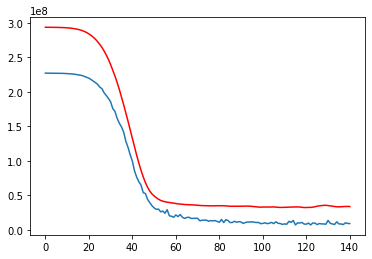

In [151]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],c='red')

In [152]:
from sklearn.metrics import r2_score

y_train_pred=nn.predict(x_train_scaled)
y_test_pred=nn.predict(x_test_scaled)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

2/2 [==============================] - 0s 1ms/step
0.8381414909980027
0.8184660238943542
